In [1]:
!pip install pymysql
!pip install tensorflow

     |████████████████████████████████| 51kB 1.9MB/s 


In [2]:
import pymysql
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn import datasets, linear_model, preprocessing
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import optimizers
import tensorflow.keras.backend as K

import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# with open('DB_INFO.txt', 'r') as key:
#   DB_INFO = [line.rstrip('\n') for line in key]

# connection = pymysql.connect(host=DB_INFO[0],
#   port=int(DB_INFO[1]),
#   user=DB_INFO[2],
#   password=DB_INFO[3],
#   db=DB_INFO[4],
#   charset='utf8mb4')

connection = pymysql.connect(host='dodgeorplay.clwznvkuuypv.us-east-2.rds.amazonaws.com',
  port=3306,
  user='admin',
  password='admin1admin',
  db='DodgeOrPlay',
  charset='utf8mb4')
    
cursor = connection.cursor()

In [4]:
query = 'SELECT * FROM testData'
# query = 'SELECT s1g1visionScore, s1g2visionScore, s2g1visionScore, s2g2visionScore, s3g1visionScore, s3g2visionScore, s4g1visionScore, s4g2visionScore, s5g1visionScore, s5g2visionScore, win, gameId FROM testData'
# query = 'SELECT s1g1damageDealtToTurrets, s1g2damageDealtToTurrets, s2g1damageDealtToTurrets, s2g2damageDealtToTurrets, s3g1damageDealtToTurrets, s3g2damageDealtToTurrets, s4g1damageDealtToTurrets, s4g2damageDealtToTurrets, s5g1damageDealtToTurrets, s5g2damageDealtToTurrets, win, gameId FROM testData'
# query = 'SELECT s1g1win, s1g2win, s2g1win, s2g2win, s3g1win, s3g2win, s4g1win, s4g2win, s5g1win, s5g2win, win, gameId FROM testData'

cursor.execute(query)
data = np.array(cursor.fetchall())[:,:-1]
data = data.astype(float).astype(int)
# for i in range(len(data)):
#   for j in range(len(data[0])):
#     if data[i,j] == None:
#       data[i,j] = np.nan
data=data[~np.isnan(data).any(axis=1)]
X = preprocessing.normalize(data[:,:-1])
y = data[:,-1]
X, y

(array([[2.02158630e-02, 3.91085058e-03, 1.47024458e-05, ...,
         2.33768888e-03, 5.73395386e-04, 1.47024458e-05],
        [2.68621448e-02, 1.94653223e-03, 7.07829902e-05, ...,
         4.21158792e-03, 2.83131961e-04, 1.76957475e-05],
        [2.30631061e-02, 1.00551950e-03, 6.38425081e-05, ...,
         1.03744076e-03, 2.55370032e-04, 0.00000000e+00],
        ...,
        [2.47467240e-02, 1.67672903e-03, 4.49123848e-05, ...,
         3.24866250e-03, 2.39532719e-04, 0.00000000e+00],
        [2.52994978e-02, 1.48722279e-03, 6.68414736e-05, ...,
         1.63761610e-03, 3.00786631e-04, 1.67103684e-05],
        [2.63589510e-02, 7.92522605e-03, 6.37845155e-05, ...,
         3.12544126e-03, 2.55138062e-04, 0.00000000e+00]]),
 array([0, 1, 1, ..., 0, 1, 0]))

In [0]:
Xtr, Xts, ytr, yts = train_test_split(X,y,test_size=0.3,shuffle=True)

In [0]:
K.clear_session()

In [7]:
nin = Xtr.shape[1]
nh = 2000
nout = 1
model = Sequential()
model.add(Dense(units=nh, input_shape=(nin,), activation='sigmoid', name='hidden'))
model.add(Dense(units=nout, activation='sigmoid', name='output'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 2000)              282000    
_________________________________________________________________
output (Dense)               (None, 1)                 2001      
Total params: 284,001
Trainable params: 284,001
Non-trainable params: 0
_________________________________________________________________


In [9]:
opt = optimizers.Adam(lr=0.01)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## **Neural Network Results**

Although training data goes up from 50% to 80%, the test data remains around 50%, meaning that there is no correlation between the different stats of your teammates and the outcome of the game. This means that even though your teammates played badly before, you still have a fair chance at winning the game. The way the game plays out is uncertain, and the strength of the opposing team is also unknown.

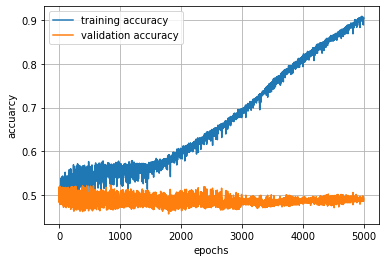

In [10]:
# nit = 20   # number of training iterations
# nepoch_per_it = 100  # number of epochs per iterations

# # Loss, accuracy and epoch per iteration
# loss = np.zeros(nit)
# acc = np.zeros(nit)
# epoch_it = np.zeros(nit)

# # Main iteration loop
# for it in range(nit):
    
#     # Continue the fit of the model
#     init_epoch = it*nepoch_per_it
#     model.fit(X, y, epochs=nepoch_per_it, batch_size=1000, verbose=0)
    
#     # Measure the loss and accuracy on the training data
#     lossi, acci = model.evaluate(X,y, verbose=0)
#     epochi = (it+1)*nepoch_per_it
#     epoch_it[it] = epochi
#     loss[it] = lossi
#     acc[it] = acci
#     print("epoch=%4d loss=%12.4e acc=%7.5f" % (epochi,lossi,acci))

hist = model.fit(Xtr, ytr, epochs=5000, batch_size=1000, validation_data=(Xts,yts), verbose=0)

tr_accuracy = hist.history['acc']
val_accuracy = hist.history['val_acc']

plt.plot(tr_accuracy)
plt.plot(val_accuracy)
plt.grid()
plt.xlabel('epochs')
plt.ylabel('accuarcy')
plt.legend(['training accuracy', 'validation accuracy'])

In [0]:
# logreg = linear_model.LogisticRegression(C=0.5)
logreg = linear_model.LogisticRegression(C=1e5)

In [21]:
logreg.fit(Xtr, ytr)
yhat = logreg.predict(Xtr)
acc = np.mean(yhat == ytr)
print("Accuracy on test data = %f" % acc)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy on test data = 0.581128


## **L2 Regularziation Results**

It seems that with a high L2 regularization constant (low C), the features with most weight are damage dealt to turrets and gold earned. This makes sense because the more gold a player earns, the stronger they get with items. Damage dealt to turrets is unexpected, but still not completely out of the ordinary, since turrets need to be destroyed to win the game.

With a low L2 regularzation constant (high C), the three most important features were assists and vision score. Vision score is definitely important to win a game, and better players tend to have a higher vision score, since higher vision score means more visible area of the map. Assists are interesting, but also makes sense because it is a better measure of kill participation than kills are. Still, kills were also important when the weights are viewed.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':


s1g1damageDealtToTurrets
s1g1goldEarned
s2g1damageDealtToTurrets
s3g2goldEarned
s4g1goldEarned
s4g2damageDealtToTurrets
s5g1damageDealtToTurrets


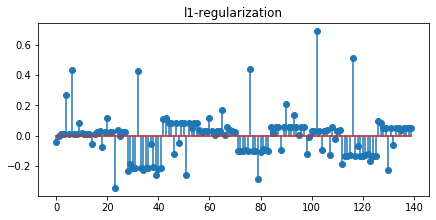

In [17]:
query = 'DESCRIBE testData;'
cursor.execute(query)
columns = cursor.fetchall()

W_l1 = logreg.coef_

plt.figure(figsize=(7,7))
# plt.subplot(2,1,1)
# plt.stem(W[0,:])
# plt.title('No regularization')
plt.subplot(2,1,2)
plt.stem(W_l1[0,:])
plt.title('l1-regularization')
for i in range(len(W_l1[0])):
  w = W_l1[0, i]
  if w > 0.2:
  # if w > 150:
    print(columns[i][0])

In [14]:
query = 'SELECT COUNT(*) FROM testData;'
cursor.execute(query)
print(cursor.fetchall())
# cursor.close()
# connection.close()

((3725,),)
